In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Stacking

Type of ensemble method with the following properties:

- Uses heterogeneous weak learners. That is, it combines families of different models.



- These individual models are trained in parallel, no sequential processing is needed.



- Predictions for each individual model are entered as predictor or input variables of the final model, also called meta learner.


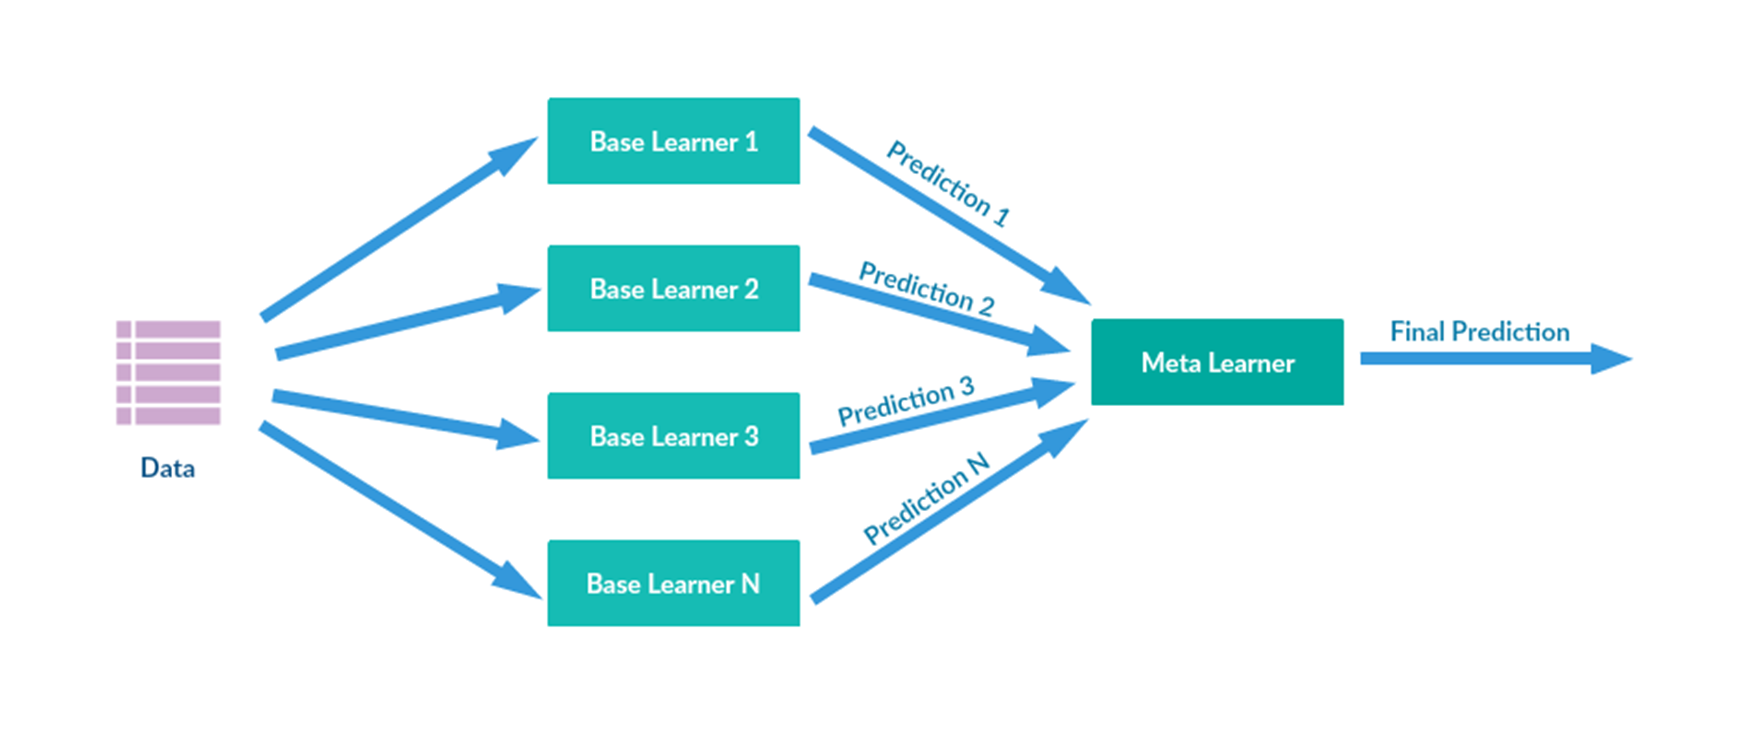

## Load Data

In [2]:
# Import CSV mtcars
dat = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')

# Edit element of column header
dat.rename(columns={'Unnamed: 0':'brand'}, inplace=True)

# Visualize data
dat

,brand,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


We remove the car's brand

In [3]:
dat = dat.drop('brand', axis = 1)

We want to predict column *mpg*.

In [4]:
target = 'mpg'
y = dat[target]
X = dat.drop(target, axis = 1)
X

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Let's split into train, validation and test.

In [5]:
# Split into train/val/test
perc_values = [0.4, 0.4, 0.2];
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y,test_size=perc_values[1] + perc_values[2], random_state=1);
X_train_2, X_test, y_train_2, y_test = train_test_split(X_valtest, y_valtest,test_size= perc_values[2] / (perc_values[1] + perc_values[2]), random_state=1)


In [6]:
X_train

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
29,6,145.0,175,3.62,2.770,15.50,0,1,5,6
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
16,8,440.0,230,3.23,5.345,17.42,0,0,3,4
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
15,8,460.0,215,3.00,5.424,17.82,0,0,3,4
31,4,121.0,109,4.11,2.780,18.60,1,1,4,2
30,8,301.0,335,3.54,3.570,14.60,0,1,5,8
9,6,167.6,123,3.92,3.440,18.30,1,0,4,4
8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
12,8,275.8,180,3.07,3.730,17.60,0,0,3,3


## Train Base (Weak) Learners

We will train our base learners over the train dataset. For simplicity's sake we will not perform grid search to select the optimal hyperparameters.

In [7]:
# 1) Import model
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# 2) Import metric
from sklearn.metrics import mean_absolute_percentage_error as metric

In [8]:
#3) Define model
model_1 = DecisionTreeRegressor()
model_2 = XGBRegressor()

# 4) Train model
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train);

[14:12:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\jprada.SGSMAD\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


## Create New Dataset

In [9]:
# New train
pred_1 = model_1.predict(X_train_2)
pred_2 = model_2.predict(X_train_2)
X_train_2['pred_1'] = pred_1
X_train_2['pred_2'] = pred_2
X_train_2

C:\Users\jprada.SGSMAD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\jprada.SGSMAD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,pred_1,pred_2
6,8,360.0,245,3.21,3.570,15.84,0,0,3,4,15.0,15.041437
28,8,351.0,264,4.22,3.170,14.50,0,1,5,4,15.0,15.354233
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1,18.1,18.258347
26,4,120.3,91,4.43,2.140,16.70,0,1,5,2,22.8,22.627033
27,4,95.1,113,3.77,1.513,16.90,1,1,5,2,21.0,21.424252
7,4,146.7,62,3.69,3.190,20.00,1,0,4,2,22.8,22.352116
13,8,275.8,180,3.07,3.780,18.00,0,0,3,3,17.3,17.091652
14,8,472.0,205,2.93,5.250,17.98,0,0,3,4,10.4,10.402642
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8,22.627033
19,4,71.1,65,4.22,1.835,19.90,1,1,4,1,22.8,22.627033


In [10]:
# New test
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
X_test_new = X_test.copy()
X_test_new['pred_1'] = pred_1
X_test_new['pred_2'] = pred_2
X_test_new

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,pred_1,pred_2
18,4,75.7,52,4.93,1.615,18.52,1,1,4,2,22.8,22.627033
25,4,79.0,66,4.08,1.935,18.90,1,1,4,1,22.8,22.627033
21,8,318.0,150,2.76,3.520,16.87,0,0,3,2,19.2,15.177529
24,8,400.0,175,3.08,3.845,17.05,0,0,3,2,19.2,15.365080
22,8,304.0,150,3.15,3.435,17.30,0,0,3,2,19.2,15.264028
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2,19.2,15.264028
23,8,350.0,245,3.73,3.840,15.41,0,0,3,4,15.0,15.113981


## Train Meta (Strong) Learner

For simplicity's sake we will not perform grid search to select the optimal hyperparameters.

In [11]:
# 1) Import model
from sklearn.tree import DecisionTreeRegressor

In [17]:
#3) Define model
model_final = DecisionTreeRegressor()

# 4) Train model
model_final.fit(X_train_2[['pred_1', 'pred_2']], y_train_2)


DecisionTreeRegressor()

## Strong Learner Predictions

In [18]:
# 5) Make predictions
pred_train_2 = model_final.predict(X_train_2[['pred_1', 'pred_2']])
pred_test = model_final.predict(X_test_new[['pred_1', 'pred_2']])

# 6) Compute metric
metric_train_2 = metric(y_train_2, pred_train_2)
metric_test = metric(y_test, pred_test)

In [19]:
## Summary
print("MAPE_train_2 = %.2f - MAPE_test = %.2f" % (metric_train_2, metric_test));

MAPE_train_2 = 0.05 - MAPE_test = 0.09


## Base Learners Predictions

In [15]:
# 5) Make predictions
pred_train_m1 = model_1.predict(X_train)
pred_train_m2 = model_2.predict(X_train)
pred_test_m1 = model_1.predict(X_test)
pred_test_m2 = model_2.predict(X_test)

# 6) Compute metric
metric_train_m1 = metric(y_train, pred_train_m1)
metric_train_m2 = metric(y_train, pred_train_m2)
metric_test_m1 = metric(y_test, pred_test_m1)
metric_test_m2 = metric(y_test, pred_test_m2)

In [16]:
## Summary
print("MAPE_train model 1 = %.2f - MAPE_test model 1 = %.2f" % (metric_train_m1, metric_test_m1));
print("MAPE_train model 2 = %.2f - MAPE_test model 2 = %.2f" % (metric_train_m2, metric_test_m2));

MAPE_train model 1 = 0.00 - MAPE_test model 1 = 0.15
MAPE_train model 2 = 0.00 - MAPE_test model 2 = 0.14
